# Install requirements

In [1]:
# !pip install -r requirements.txt

# Import libraries

In [2]:
from Evaluation_function import Evaluate
import pandas as pd
from gensim.models import KeyedVectors, Word2Vec
from utilities import WordVecVectorizer

pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minamelek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Evaluation Using Word2vec vectorization

(3831, 1)
Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.
Adding dictionaries ...  Done.
Visualizing ...


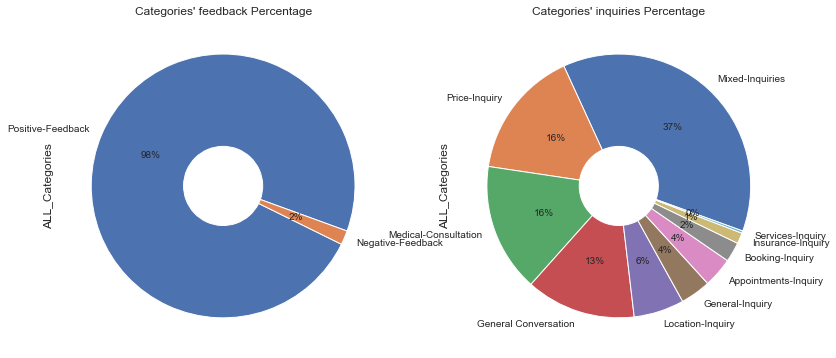

Visualizing ...


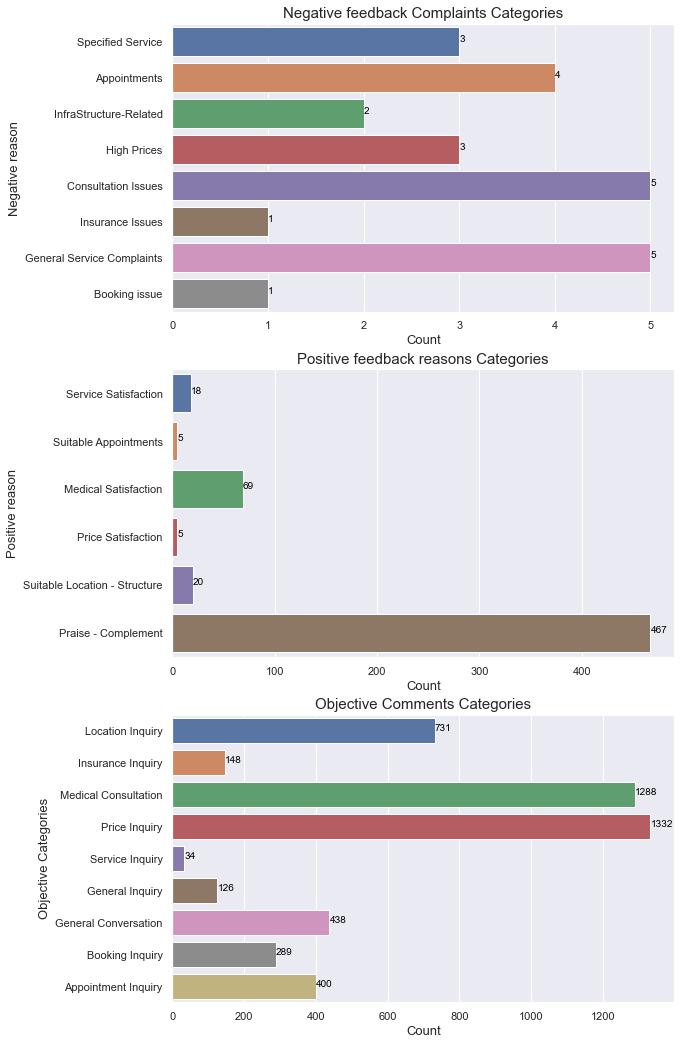

(3831, 6)


,message,cleaned,predicted,tags,inquiry,ALL_Categories
2641,كل سنه وانتم طيبين جميعااا,كل سنه وانتم طيبين جميعا,obj,,0,General Conversation
2172,بالتوفيق باذن الله يا دكتور هيثم,بالتوفيق باذن الله يا دكتور يثم,pos,,0,Positive-Feedback
2720,ربنا يحفظهم من كل شر,ربنا يحفظهم من كل شر,obj,,0,General Conversation
5,بشرتي حساسه جدا وفيها بقعتين بني فاتح في الخدود مضايفني اوي وعلجتهم كتير بيبهتوا لكن مش بيختفوا ...,بشرتي حساسه جدا وفيها بقعتين بني فاتح في الخدود مضايفني اوي وعلجتهم كتير بيبهتوا لكن ما بيختفوا ...,obj,Medical_consult-,1,Medical-Consultation
3730,بجد تسلم الايادي مجهود رائع ولكم منا جزيل الشكر,بجد تسلم الايادي مجهود رائع ولكم منا جزيل الشكر,pos,Medical_consult-,1,Positive-Feedback


In [3]:
df = pd.read_csv('./data/data.csv')
print(df.shape)
eval = Evaluate(df)
transformed = eval.transform(vect_type="w2v", vect_path='./models/w2v_model.bin')
predictiones = eval.predict(input=transformed, model_name='FCNN_w2v_model')
eval.add_dicts()
eval.visualize(kind='pie')
eval.visualize(kind='bar')
Final_data = eval.get_data()
print(Final_data.shape)
Final_data.sample(5, random_state=43)

In [ ]:
# Loading the w2v model externally, instead of loading it everytime the function is called
#########################################################
print("Loading word2vec (Externally) ..", end=' ')
word2vec = KeyedVectors.load_word2vec_format('./models/w2v_model.bin', binary=True)
vect_model = WordVecVectorizer(word2vec)
print("Done.")
#########################################################
# eval.transform takes vect_model instead of vect_path
transformed_2 = eval.transform(vect_type="w2v", vect_model=vect_model) 


In [4]:
# Save prediction
Final_data.to_csv("./output/out.csv", index=False)

# Evaluation using a majority voting between 4 different models


1. Prediction using FCNN model with tfidf vectorization
Loading Tf-Idf model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.

2. Prediction using FCNN model with word2vec vectorization
Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.

3. Prediction using LSTM model with word2vec vectorization
Loading Word2Vec model ...
Transforming data ... Done.
Loading Classification model ... 
Evaluating the model ... Done.

4. Prediction using pretrained lexicons
Loading Lexicons ... 
Done.

Adding dictionaries ...  Done.
Visualizing ...


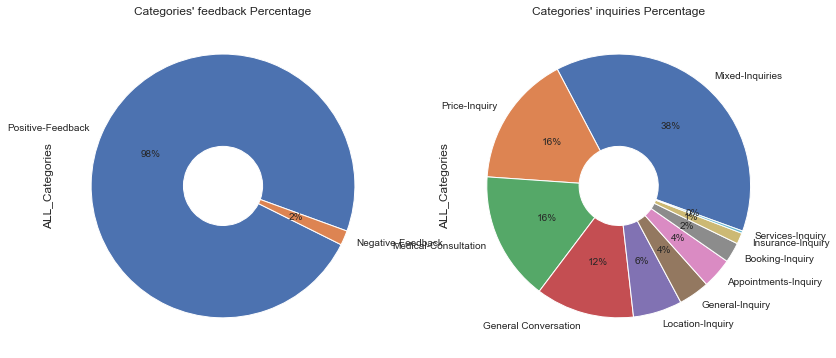

Visualizing ...


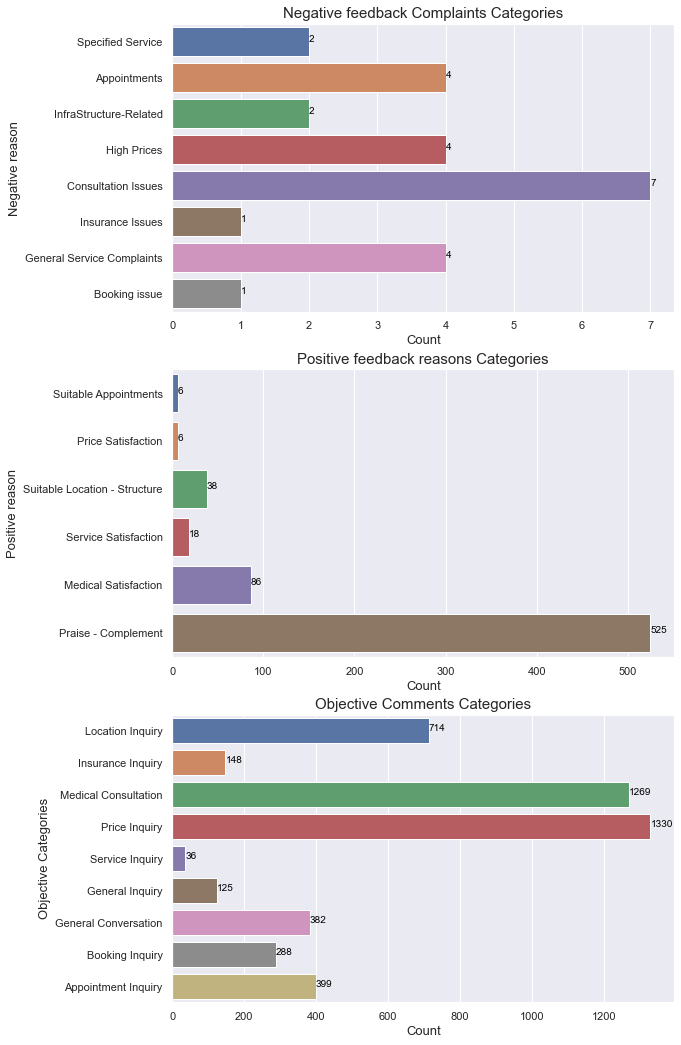

,message,cleaned,predicted,tags,inquiry,ALL_Categories
2641,كل سنه وانتم طيبين جميعااا,كل سنه وانتم طيبين جميعا,obj,,0,General Conversation
2172,بالتوفيق باذن الله يا دكتور هيثم,بالتوفيق باذن الله يا دكتور يثم,pos,,0,Positive-Feedback
2720,ربنا يحفظهم من كل شر,ربنا يحفظهم من كل شر,obj,,0,General Conversation
5,بشرتي حساسه جدا وفيها بقعتين بني فاتح في الخدود مضايفني اوي وعلجتهم كتير بيبهتوا لكن مش بيختفوا ...,بشرتي حساسه جدا وفيها بقعتين بني فاتح في الخدود مضايفني اوي وعلجتهم كتير بيبهتوا لكن ما بيختفوا ...,obj,Medical_consult-,1,Medical-Consultation
3730,بجد تسلم الايادي مجهود رائع ولكم منا جزيل الشكر,بجد تسلم الايادي مجهود رائع ولكم منا جزيل الشكر,pos,Medical_consult-,1,Positive-Feedback


In [5]:
from time import time

df = pd.read_csv('./data/data.csv')
t = []
t.append(time()) # Start time
# Initialization
eval = Evaluate(df, text_column='message')
t.append(time()) # init time
# Tfidf-based prediction
print("\n1. Prediction using FCNN model with tfidf vectorization")
predictiones = eval.predict(model_name='FCNN_tfidf_model')
t.append(time()) # tfidf time
# Word2vec-based prediction
print("\n2. Prediction using FCNN model with word2vec vectorization")
predictiones_2 = eval.predict(model_name='FCNN_w2v_model')
t.append(time()) # w2v time
# Word2vec-based prediction using lstm model
print("\n3. Prediction using LSTM model with word2vec vectorization")
predictiones_3 = eval.predict(model_name='FCNN_w2v_lstm_model')
t.append(time()) # lstm model time
# Lexicons-based prediction
print("\n4. Prediction using pretrained lexicons")
predictiones_4 = eval.predict(lexicon_prediction=True, lex_path='models/Full_lexicons.csv')
t.append(time()) # lex computing time
print()
# Objective categorization
eval.add_dicts()
t.append(time()) # dictionary computing time
# Visualization
eval.visualize(kind='pie')
eval.visualize(kind='bar')
t.append(time()) # Visualization time / End time

Final_data = eval.get_data()
Final_data.sample(5, random_state=43)

## Time analysis

In [6]:
print("Time analysis:")
print("Full time taken: {:.2f} s".format(t[-1]-t[0]))
print("init time: {:.2f} s".format(t[1]-t[0]))
print("tfidf time: {:.2f} s".format(t[2]-t[1]))
print("w2v time: {:.2f} s".format(t[3]-t[2]))
print("w2v with lstm model time: {:.2f} s".format(t[4]-t[3]))
print("lex computing time: {:.2f} s".format(t[5]-t[4]))
print("dictionary computing time: {:.2f} s".format(t[6]-t[5]))
print("Visualization time: {:.2f} s".format(t[7]-t[6]))


Time analysis:
Full time taken: 34.51 s
init time: 0.61 s
tfidf time: 1.64 s
w2v time: 3.34 s
w2v with lstm model time: 24.88 s
lex computing time: 0.74 s
dictionary computing time: 1.71 s
Visualization time: 1.60 s
